Missing value imputation using basic python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [4]:
dataset = pd.read_excel('C:/Users/Thamesh/Downloads/stark_data.xlsx')

In [5]:
dataset.head()

,Character,Age,Gender,Survived
0,Eddard,52.0,Male,0
1,John,27.0,Male,1
2,Arya,21.0,Female,1
3,Bran,19.0,Male,1
4,Robb,NaN,Male,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
Character    6 non-null object
Age          5 non-null float64
Gender       6 non-null object
Survived     6 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 272.0+ bytes


In [7]:
dataset.isnull()

,Character,Age,Gender,Survived
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,False,False,False


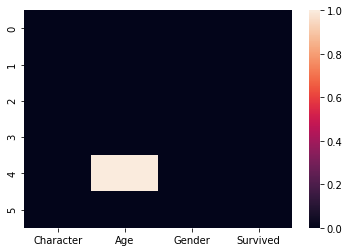

In [8]:
sb.heatmap(dataset.isnull())

In [9]:
# populating values in independant and dependent var
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,3] # integer based location
X

,Character,Age,Gender
0,Eddard,52.0,Male
1,John,27.0,Male
2,Arya,21.0,Female
3,Bran,19.0,Male
4,Robb,NaN,Male
5,Sansa,24.0,Female


In [10]:
X['Age']

0    52.0
1    27.0
2    21.0
3    19.0
4     NaN
5    24.0
Name: Age, dtype: float64

In [11]:
X['Age'].mean()

28.6

In [12]:
def impute_age(Age):
    if pd.isnull(Age):
        return 28.6
    else:
        return Age

In [13]:
X['Age'] = X['Age'].apply(impute_age)

In [14]:
X

,Character,Age,Gender
0,Eddard,52.0,Male
1,John,27.0,Male
2,Arya,21.0,Female
3,Bran,19.0,Male
4,Robb,28.6,Male
5,Sansa,24.0,Female


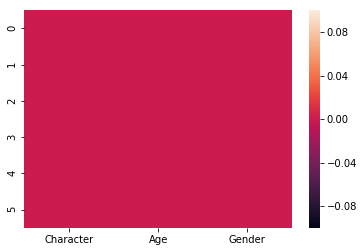

In [15]:
sb.heatmap(X.isnull()) # plot null values in seaborn

## Missing value imputation using ML model

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [18]:
dataset 

,Character,Age,Gender,Survived
0,Eddard,52.0,Male,0
1,John,27.0,Male,1
2,Arya,21.0,Female,1
3,Bran,19.0,Male,1
4,Robb,NaN,Male,0
5,Sansa,24.0,Female,1


In [19]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,3].values
X[:,1:2]

array([[52.0],
       [27.0],
       [21.0],
       [19.0],
       [nan],
       [24.0]], dtype=object)

In [21]:
from sklearn.preprocessing import Imputer # input missing value using sklearn imputet from preprocessing
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer.fit(X[:,1:2])
X[:,1:2] = imputer.transform(X[:,1:2])
X[:,1:2]

C:\Users\Thamesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[52.0],
       [27.0],
       [21.0],
       [19.0],
       [28.6],
       [24.0]], dtype=object)

In [22]:
sb.heatmap(X.isnull())

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [30]:
X=pd.DataFrame (X)



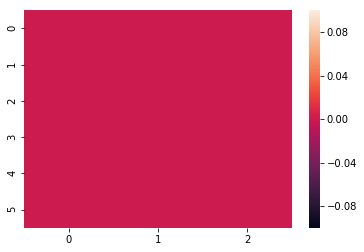

In [31]:
sb.heatmap(X.isnull())